In [7]:
# code test
import numpy as np
import random

mask = np.full((10, 1, 128), True)
for sample in range(len(mask)):
    for ch in range(len(mask[0])):
        mask[sample][ch][:20] = False
        np.random.shuffle(mask[sample][ch])

In [23]:
mask[2][0]

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False]

In [17]:
mask = np.full((10, 1, 128), True)

In [18]:
mask[0][0][:20] = False

In [19]:
np.random.shuffle(mask[0][0])
mask[0][0]

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True]

In [1]:
from MITBIH import mitbih_masked

In [3]:
cond_data = mitbih_masked()

Data shape of Non-Ectopic Beats instances = (72471, 1, 128)


In [13]:
from torch.utils import data

dataloader = data.DataLoader(cond_data, batch_size=1, num_workers=1, shuffle=True)

In [19]:
import matplotlib.pyplot as plt
org_sigs = []
cond_sigs = []

for i, data_dict in enumerate(dataloader):
    org_sigs.append(data_dict['org_data'])
    cond_sigs.append(data_dict['cond_data'])
    
    if i >= 9: 
        break
    

In [20]:
len(org_sigs)

10

In [ ]:
org_sigs[]

In [32]:
def pot_signals(signals):
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            for k in range(1):
                axs[i, j].plot(signals[i*5+j][0][k][:])
    

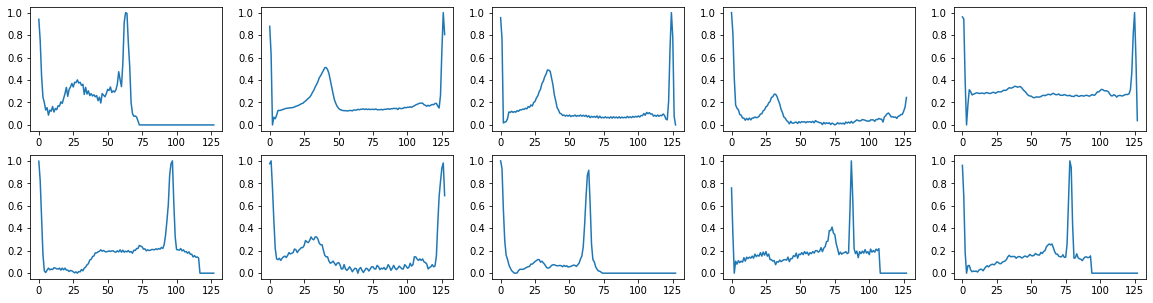

In [33]:
pot_signals(org_sigs)

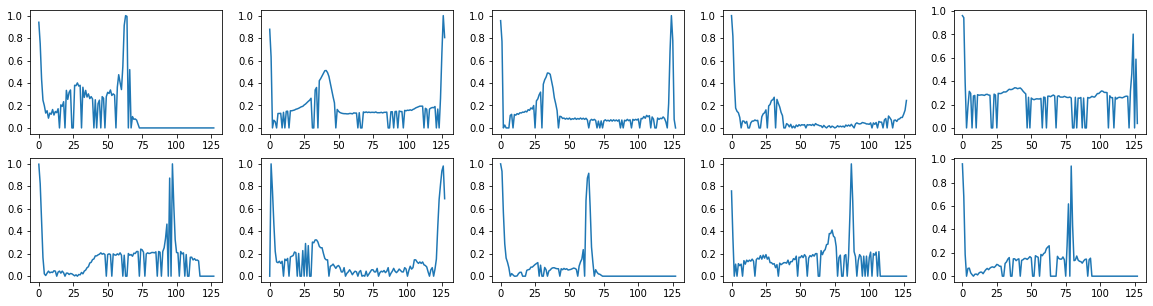

In [34]:
pot_signals(cond_sigs)

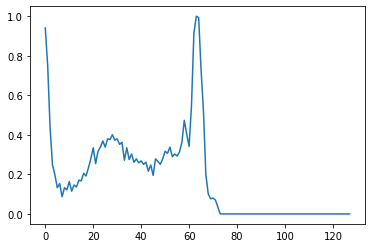

In [37]:
plt.plot(org_sigs[0][0][0])

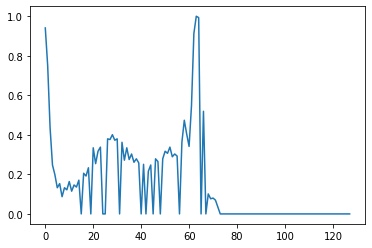

In [38]:
plt.plot(cond_sigs[0][0][0])

In [44]:
cond_data = mitbih_masked()

Data shape of Non-Ectopic Beats instances = (72471, 1, 128)


In [45]:
data_point1 = cond_data.cond_data[0]
print(data_point1.shape)

(1, 128)


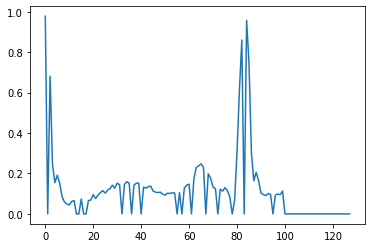

In [62]:
plt.plot(data_point1[0][:])

In [46]:
cond_mul10 = np.array([data_point1] * 10)
print(cond_mul10.shape)

(10, 1, 128)


In [54]:
import torch
import torch.nn as nn
from modules1D_cond import Unet1D, GaussianDiffusion1D

In [51]:
device = 'cuda:0'

In [52]:
cond_data = torch.from_numpy(cond_mul10)
cond_data = cond_data.to(device).to(torch.float)

In [55]:
model = Unet1D(
    dim = 64,
    self_condition = True,
    dim_mults = (1, 2, 4, 8),
    channels = 1).to(device)

ckpt = torch.load("./checkpoint/DDPM1D_Selfcondtional_maskedCond/checkpoint.pt")
model.load_state_dict(ckpt['model_state_dict'])

# seq_length must be able to divided by dim_mults
diffusion = GaussianDiffusion1D(
    model,
    seq_length = 128,
    timesteps = 1000,
    objective = 'pred_v').to(device)

In [56]:
sampled_data_mul10 = diffusion.sample(batch_size = 10, input_cond = cond_data)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [59]:
print(sampled_data_mul10.shape) # (sample_size, 3, 150)
sampled_data_mul10 = sampled_data_mul10.to('cpu').detach().numpy()

torch.Size([10, 1, 128])


In [60]:
def plot_signals_cls_free(signals, title):
    dim = signals.shape[1]
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            for k in range(dim):
                axs[i, j].plot(signals[i*5+j][k][:])
    fig.suptitle(title)
    fig.show()

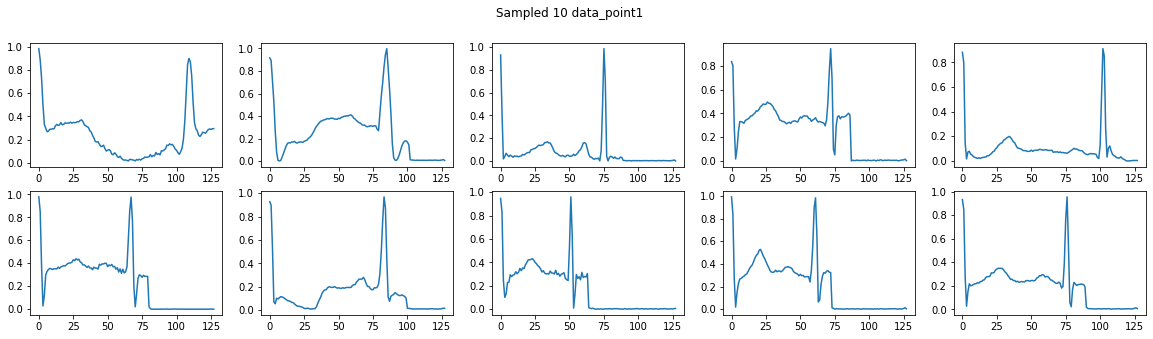

In [61]:
plot_signals_cls_free(sampled_data_mul10, 'Sampled 10 data_point1')

In [64]:
cond_data = mitbih_masked()

Data shape of Non-Ectopic Beats instances = (72471, 1, 128)


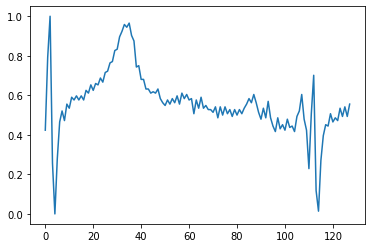

In [76]:
data_point = cond_data.data[6]
plt.plot(data_point[0][:])

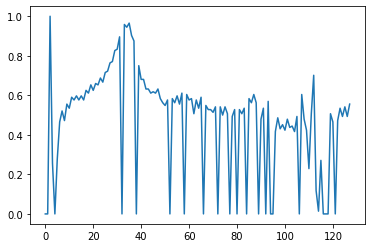

In [77]:
data_point = cond_data.cond_data[6]
plt.plot(data_point[0][:])

(10, 1, 128)


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([10, 1, 128])


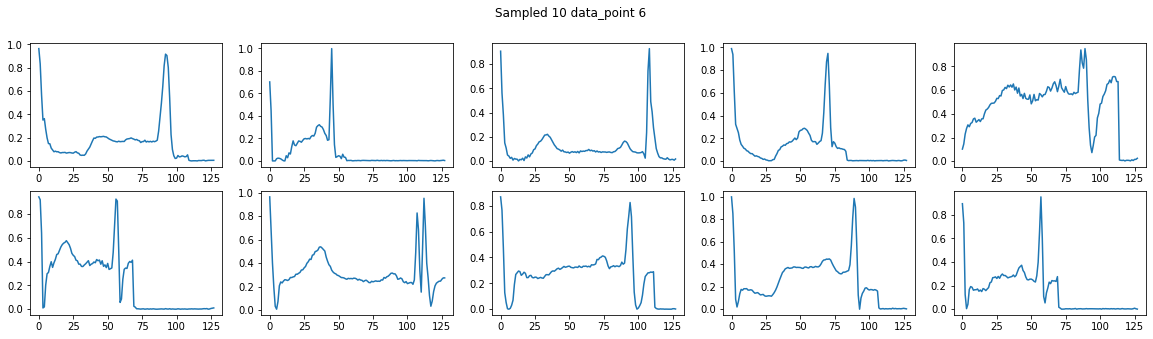

In [78]:
cond_mul10 = np.array([data_point] * 10)
print(cond_mul10.shape)
cond_data = torch.from_numpy(cond_mul10)
cond_data = cond_data.to(device).to(torch.float)
sampled_data_mul10 = diffusion.sample(batch_size = 10, input_cond = cond_data)
print(sampled_data_mul10.shape) # (sample_size, 3, 150)
sampled_data_mul10 = sampled_data_mul10.to('cpu').detach().numpy()
plot_signals_cls_free(sampled_data_mul10, 'Sampled 10 data_point 6')